# **Contents**

- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Modeling
- Conclusion
- Recommendation

# **Business Problem Understanding**

## Context

Kota Daegu adalah salah satu kota metropolitan besar di Korea Selatan, memiliki kebutuhan hunian yang sangat tinggi akibat keterbatasan lahan dan aktivitas bisnis yang padat di wilayah perkotaan. Oleh karena itu, apartemen menjadi preferensi utama bagi masyarakat setempat untuk peningkatan efisiensi lahan, kualitas fasilitas umum, dan aksesibilitas.

Praktiknya, pemilik atau developer apartemen sering kali menentukan harga unit secara mandiri. Namun, ada kemungkinan harga unit yang ditentukan terlalu tinggi (sehingga sulit terjual) atau terlalu rendah (sehingga profit tidak maksimal). Oleh karena itu, penting untuk memahami faktor yang memengaruhi harga apartemen.

## Background Problem

Menurut ChosunBiz (2025), Kota Daegu sedang mengalami oversupply apartment: jumlah unit yang tersedia jauh lebih banyak dari permintaan pasar. Hal ini memicu persaingan ketat dalam penjualan unit apartemen.

**Untuk mengurangi kerugian finansial akibat kesalahan penentuan harga, diperlukan pendekatan yang lebih objektif dan terukur. Namun, ada keterbatasan dari sisi pemilik atau developer apartemen:**
- Kurangnya data mengenai faktor apa saja yang menentukan harga jual apartemen
- Kesulitan menganalisa dan benchmarking unit apartemen dengan apartemen lain

**Ada beberapa masalah yang dapat muncul dalam pengembangan dan penentuan harga jual apartemen tanpa basis data:**
- Harga terlalu tinggi --> sulit terjual karena kalah dalam perang harga
- Harga terlalu rendah --> profit tidak maksimal
- Salah memprioritaskan aspek pembangunan

### Problem Statement

***Bagaimana memprediksi harga jual apartemen secara akurat berdasarkan karakteristik internal dan eksternal unit agar pemilik atau perusahaan dapat memasang harga yang kompetitif dan optimal?***

## Objective

1. Membangun machine learning model yang mampu memprediksi harga apartemen secara akurat.
2. Mengidentifikasi fitur yang paling memengaruhi nilai unit.

## Analytic Approach

1. EDA
2. Feature Engineering
3. Regression Modeling
4. Model Selection

## Evaluation Metrics

- **RMSE (Root Mean Squared Error):** Mengukur rata-rata akar dari kuadrat error; semakin kecil semakin baik.

- **MAE (Mean Absolute Error):** Mengukur rata-rata kesalahan absolut.

- **MAPE (Mean Absolute Percentage Error):** Mengukur rata-rata kesalahan persentase absolut.

## Success Criteria

### Kriteria Bisnis

- Model membantu menentukan harga yang realistis dan kompetitif.
- Insight fitur penting berguna untuk keputusan pembangunan dan pemasaran.
- Pricing lebih cepat, konsisten, dan tidak bergantung pada intuisi.

### Kriteria Teknis

- RMSE dan MAE rendah (error kecil).
- MAPE < 25% pada data test.
- Model tidak overfitting (train vs test mirip).
- Feature importance mudah dijelaskan.

# **Data Understanding**

| Feature                          | Description                                        |
|----------------------------------|----------------------------------------------------|
| Hallway Type                     | Apartment type                                     |
| TimeToSubway                     | Time needed to reach the nearest subway station    |
| SubwayStation                    | Name of the nearest subway station                 |
| N_FacilitiesNearBy(ETC)          | Number of other nearby facilities                  |
| N_FacilitiesNearBy(PublicOffice) | Number of nearby public office facilities          |
| N_SchoolNearBy(University)       | Number of universities nearby                      |
| N_Parkinglot(Basement)           | Number of basement parking lots                    |
| YearBuilt                        | Year the apartment was built                       |
| N_FacilitiesInApt                | Number of facilities within the apartment complex  |
| Size (sqft)                      | Apartment size in square feet                      |
| SalePrice                        | Apartment price (Won)                              |


In [90]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load Data

In [91]:
# Load Data
df = pd.read_csv('data_daegu_apartment.csv')

In [92]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


## Exploratory Data Analysis

### Struktur Data Set

In [93]:
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


**Tidak ada missing value; semua data sudah dalam tipe yang benar.**

### Statistik Deskriptif

In [94]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


### Distribusi Target

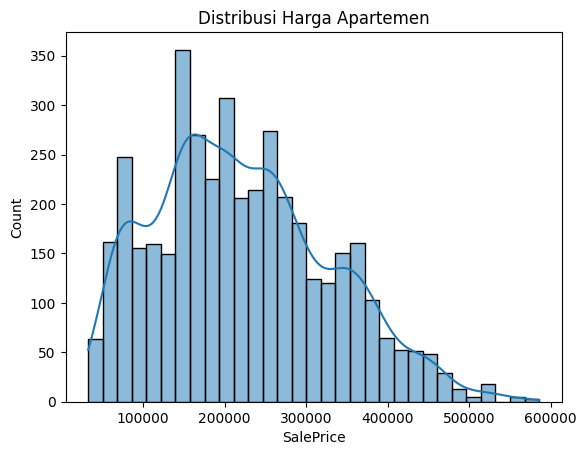

In [95]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribusi Harga Apartemen")
plt.show()

Sales price mengalami **right skewed**: lebih banyak data pada harga rendah.

Kemungkinan besar model yang sensitif terhadap skewess (contoh: Linear Regression) tidak akan terlalu akurat.

### Distribusi Fitur Numerik

In [96]:
kat_feature = df.select_dtypes(include=['object']).columns

for col in kat_feature:
    print(df[col].value_counts())
    print("\n")


HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64


TimeToSubway
0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: count, dtype: int64


SubwayStation
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: count, dtype: int64




Fitur NearSubwayStation memiliki delapan kategori dengan distribusi yang cukup proporsional. Dua kategori dengan jumlah sampel kecil (chilsung_market dan daegu) masih berada pada batas yang aman sehingga tidak perlu dilakukan penggabungan kategori. Oleh karena itu, fitur ini dapat langsung diproses menggunakan One-Hot Encoding tanpa modifikasi tambahan.

### Korelasi Fitur Numerik

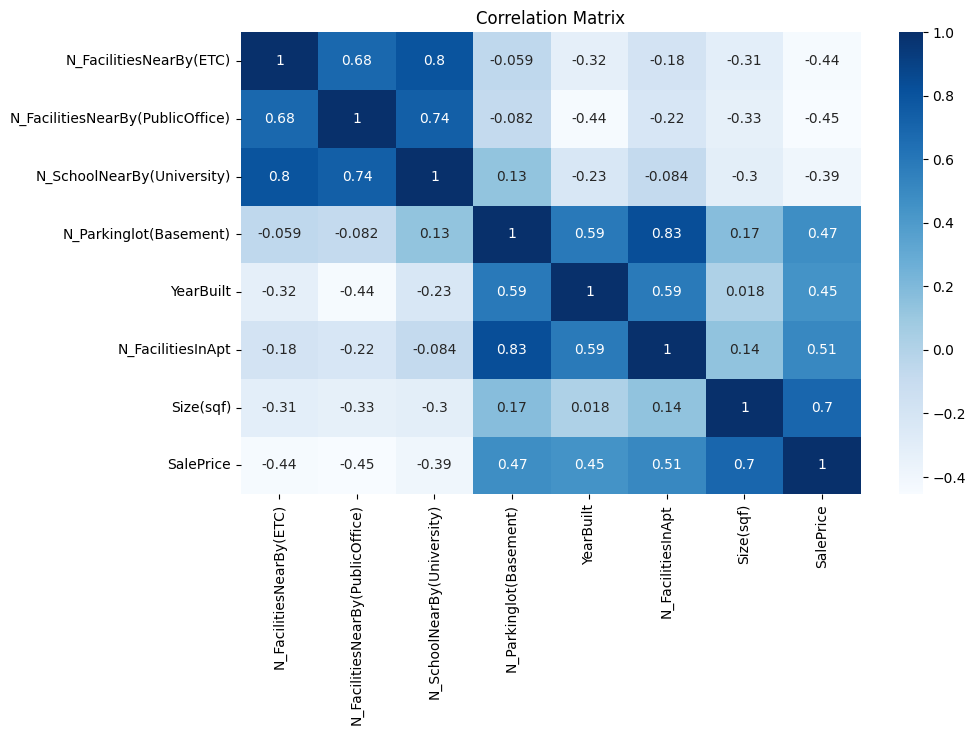

In [97]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


### Analisis Outlier

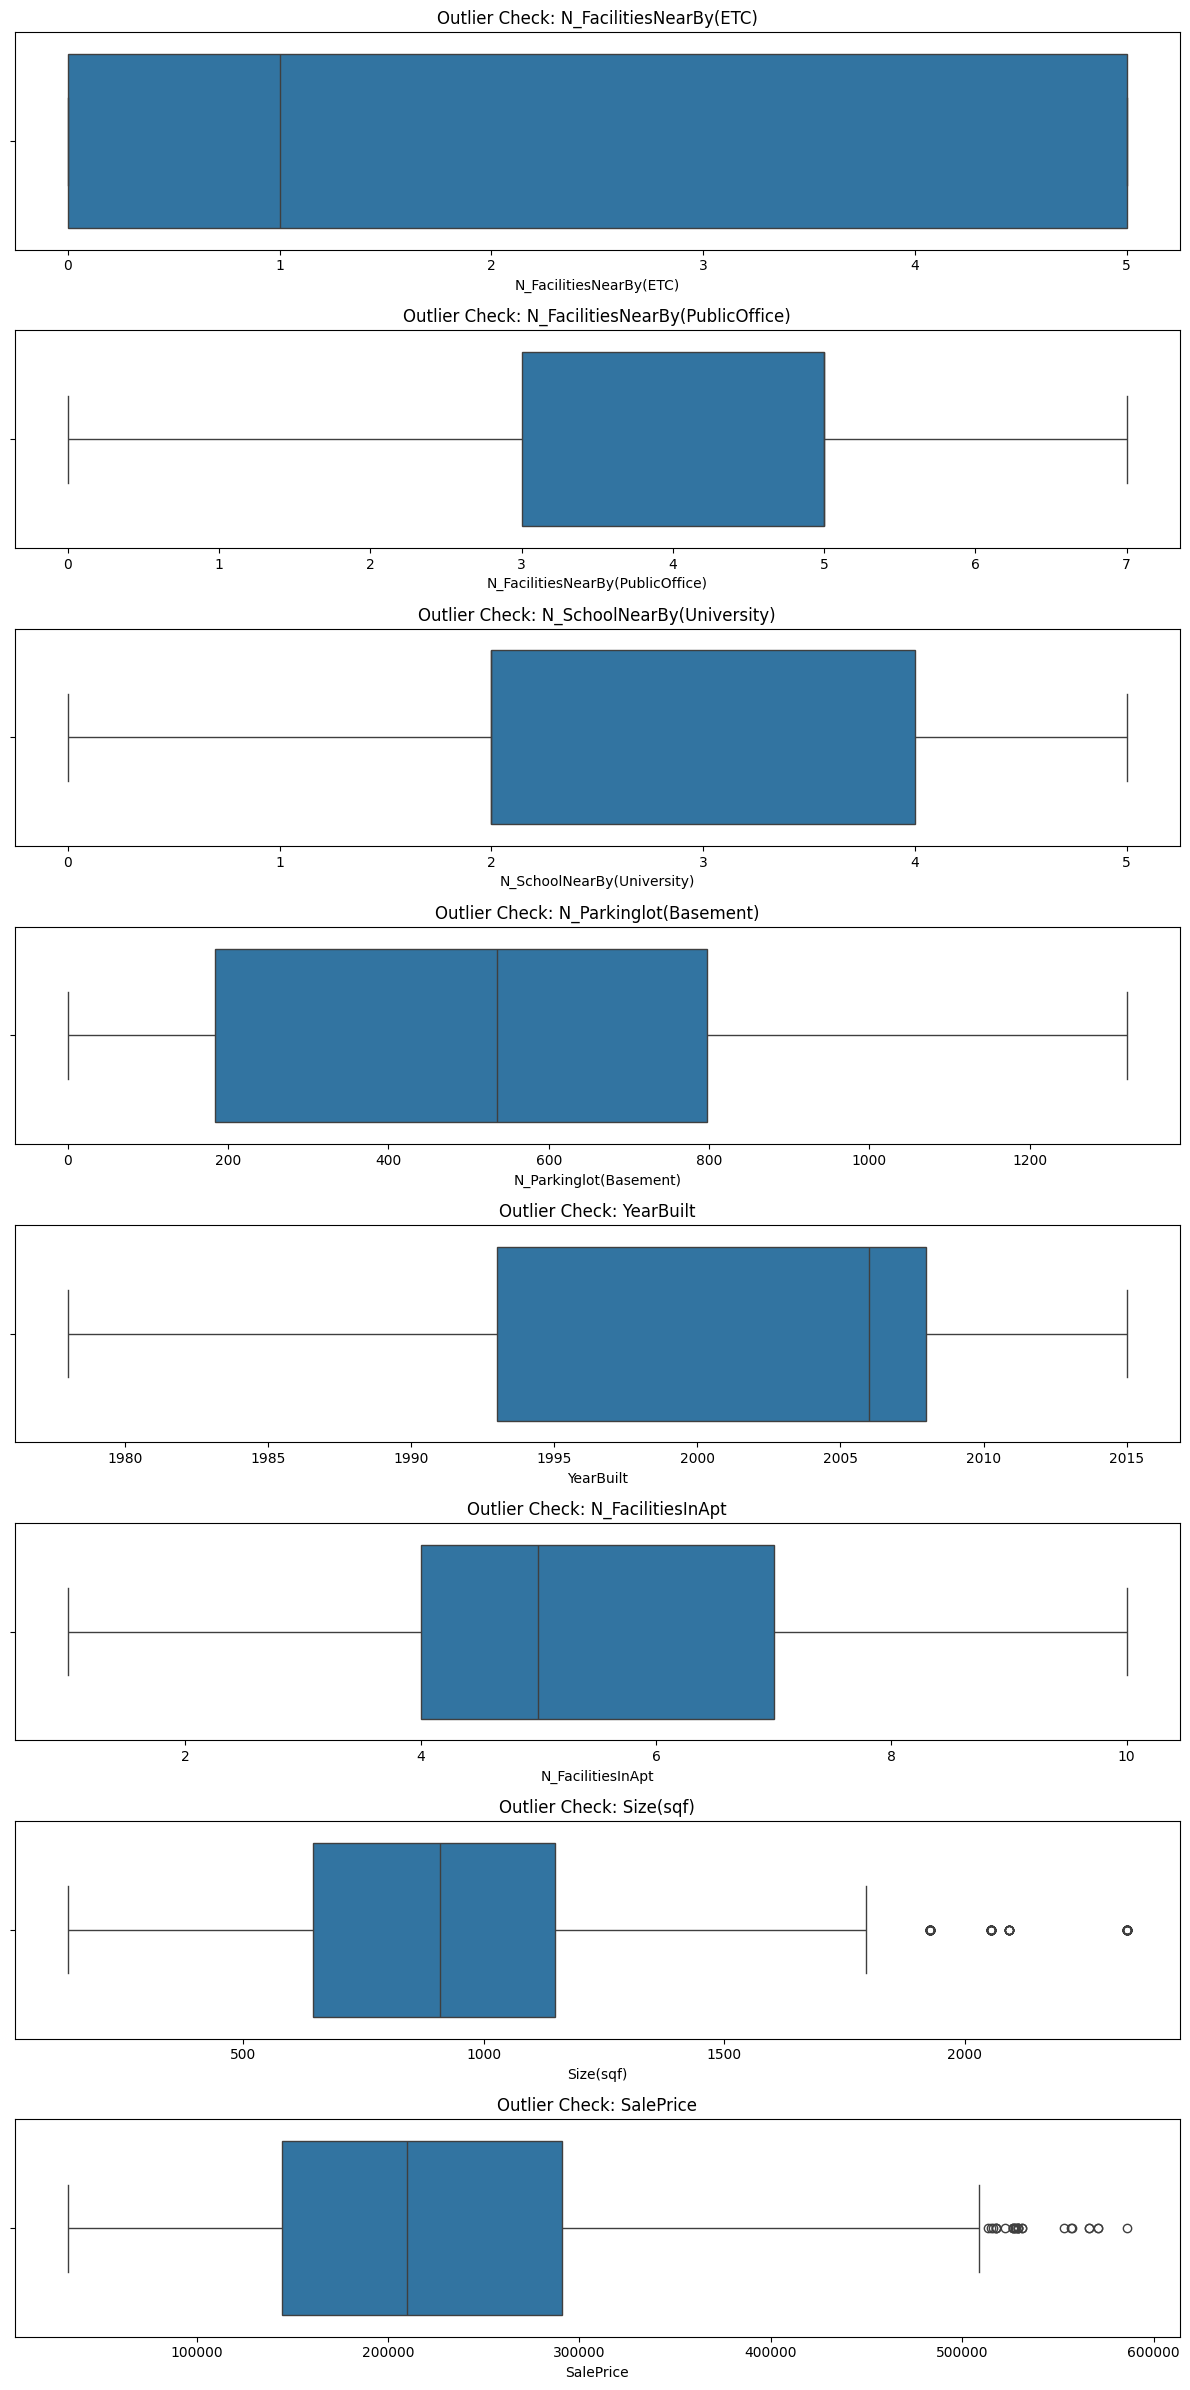

In [98]:
plt.figure(figsize=(12, len(num_features)*3))

for i, col in enumerate(num_features, 1):
    plt.subplot(len(num_features), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.tight_layout()

Hanya terdapat outlier pada fitur Size dan SalePrice. Namun secara keseluruhan nilai kedua nya masih masuk akal secara domain knowledge. Untuk fitur lainnya, tidak ditemukan outlier.

Spearman correlation fitur vs SalePrice:
N_FacilitiesNearBy(ETC): -0.51
N_FacilitiesNearBy(PublicOffice): -0.48
N_SchoolNearBy(University): -0.39
N_Parkinglot(Basement): 0.43
YearBuilt: 0.49
N_FacilitiesInApt: 0.52
Size(sqf): 0.70


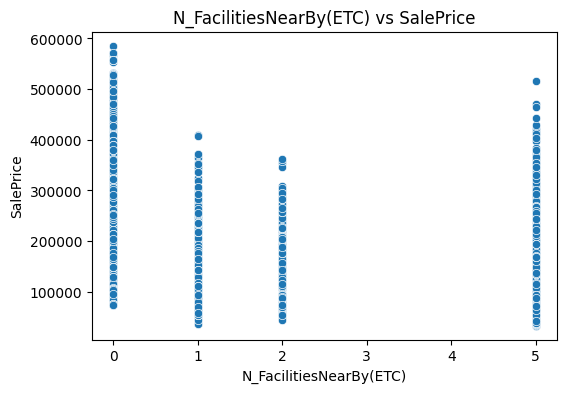

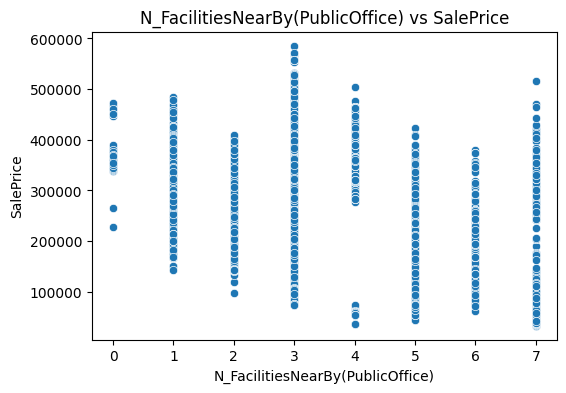

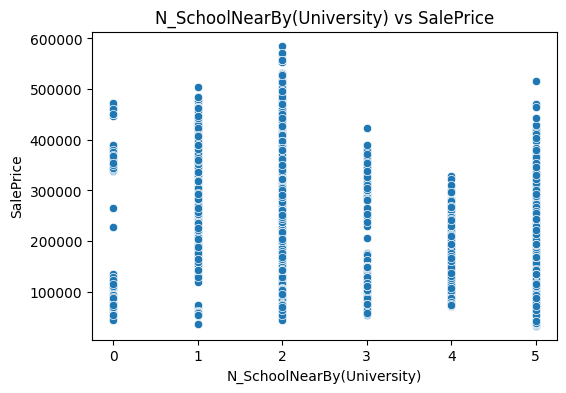

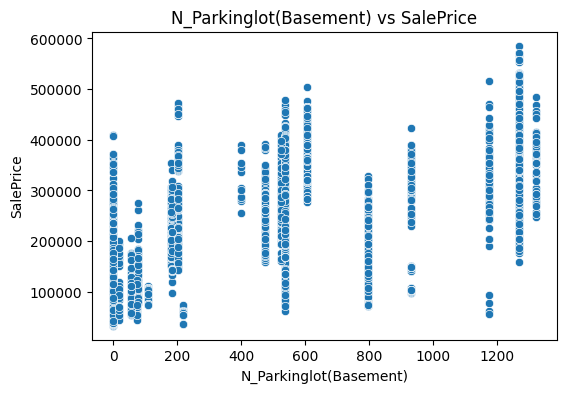

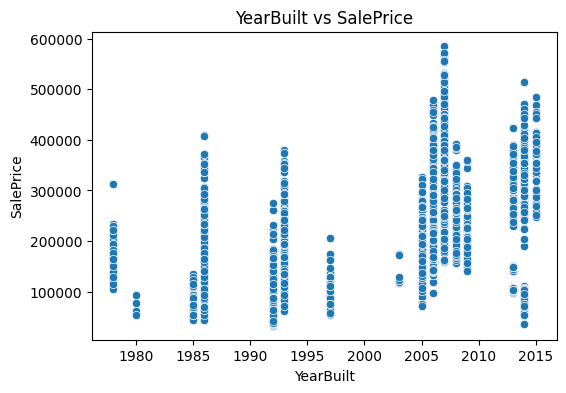

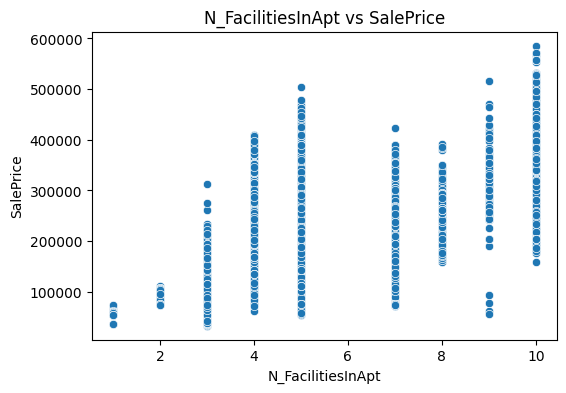

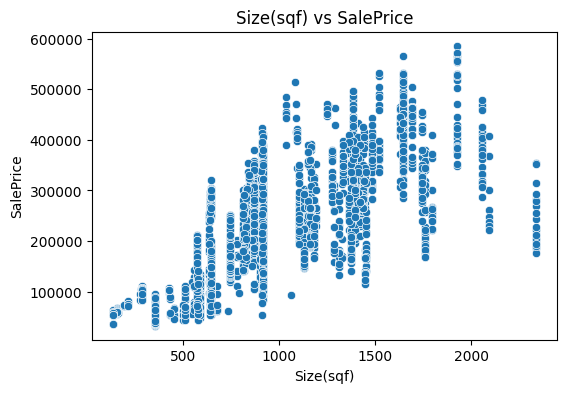

In [99]:
features = [
    'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_SchoolNearBy(University)',
    'N_Parkinglot(Basement)',
    'YearBuilt',
    'N_FacilitiesInApt',
    'Size(sqf)'
]

target = 'SalePrice'

print("Spearman correlation fitur vs SalePrice:")
for col in features:
    corr = df[col].corr(df[target], method='spearman')
    print(f"{col}: {corr:.2f}")

for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df[target])
    plt.title(f"{col} vs {target}")
    plt.show()

### Cek Multicollinearity

In [100]:
import numpy as np

corr_matrix = df[num_features].corr()

high_corr = corr_matrix[(corr_matrix > 0.8) & (corr_matrix < 1.0)]
high_corr.dropna(how='all', axis=0).dropna(how='all', axis=1)


,N_Parkinglot(Basement),N_FacilitiesInApt
N_Parkinglot(Basement),NaN,0.83428
N_FacilitiesInApt,0.83428,NaN


Ada korelasi tinggi antara N_Parkinglot(Basement) dan N_FacilitiesInApt. Hal ini dapat memicu kebingungan pada pemodelan. Hal ini akan dipertimbangkan kembali pada saat pemodelan.

### Kesimpulan

- Beberapa fitur numerik dan target SalePrice dalam kondisi right-skewed, yang umum dalam bidang properti.
- Fitur kategorikal tidak memiliki kategori ekstrem yang perlu digabung.
- N_Parkinglot(Basement) dan N_FacilitiesInApt yang berpotensi memunculkan multicollinearity (korelasi lebih dari 0.8).
- Tidak ada outlier yang tidak wajar

# **Data Preprocessing**

## Info Detail Per Fitur

In [101]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100, 2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

df_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[terraced, mixed]"
1,TimeToSubway,object,0,0.0,5,"[15min~20min, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[Bangoge, Daegu]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[2.0, 0.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[3.0, 2.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[3.0, 2.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[524.0, 184.0]"
7,YearBuilt,int64,0,0.0,16,"[2006, 2013]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 9]"
9,Size(sqf),int64,0,0.0,89,"[1088, 547]"


## Data Cleaning

**Berdasarkan hasill EDA, kita dapat melewatkan data cleaning pada missing value dan outlier. Kita akan berfokus untuk membersihkan data dari duplicate rows dan konsistensi pada penulisan fitur kategorik.**

### Duplicated Rows

In [102]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [103]:
df = df.drop_duplicates().reset_index(drop=True)


In [104]:
df = df.drop_duplicates().reset_index(drop=True)

In [105]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


### Consistency Check

In [106]:
for col in kat_feature:
    print(df[col].unique())


['terraced' 'mixed' 'corridor']
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']


Tidak ada typo atau inkonsistensi yang berarti. Bisa diperbaiki melalui mapping.

## Data Mapping

In [107]:
# Cek Data Hallway Type 

df['HallwayType'].unique()

array(['terraced', 'mixed', 'corridor'], dtype=object)

In [108]:
# Cek Data Time To Subway

df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [109]:
# Mapping Data Time To Subway (sekalian ordinal encoding manual)

map_timetosubway = {
    "0-5min": 4,
    "5min~10min": 3,
    "10min~15min": 2,
    "15min~20min": 1,
    "no_bus_stop_nearby": 0
}
df["TimeToSubwayScore"] = df["TimeToSubway"].map(map_timetosubway)

In [110]:
df[['TimeToSubway', 'TimeToSubwayScore']].head()

,TimeToSubway,TimeToSubwayScore
0,0-5min,4
1,10min~15min,2
2,15min~20min,1
3,5min~10min,3
4,0-5min,4


In [111]:
df.drop('TimeToSubway', axis=1, inplace=True)

In [112]:
# Cek Data Time To SubwayStation

df['SubwayStation'].unique()

array(['Kyungbuk_uni_hospital', 'Chil-sung-market', 'Bangoge', 'Sin-nam',
       'Banwoldang', 'no_subway_nearby', 'Myung-duk', 'Daegu'],
      dtype=object)

In [113]:
map_subway = {
    "Kyungbuk_uni_hospital": "kyungbuk_uni_hospital",
    "Chil-sung-market": "chilsung_market",
    "Bangoge": "bangoge",
    "Sin-nam": "sinnam",
    "Banwoldang": "banwoldang",
    "no_subway_nearby": "no_subway_nearby",
    "Myung-duk": "myungduk",
    "Daegu": "daegu"
}
df['NearSubwayStation'] = df['SubwayStation'].map(map_subway)
df.drop('SubwayStation', axis=1 ,inplace=True)
df

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,TimeToSubwayScore,NearSubwayStation
0,terraced,0.0,3.0,2.0,1270.0,2007,10,1387,346017,4,kyungbuk_uni_hospital
1,terraced,1.0,5.0,1.0,0.0,1986,4,914,150442,2,kyungbuk_uni_hospital
2,mixed,1.0,7.0,3.0,56.0,1997,5,558,61946,1,chilsung_market
3,mixed,5.0,5.0,4.0,798.0,2005,7,914,165486,3,bangoge
4,terraced,0.0,1.0,2.0,536.0,2006,5,1743,311504,4,sinnam
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0.0,1.0,2.0,536.0,2006,5,818,290265,4,sinnam
2697,mixed,5.0,6.0,5.0,536.0,1993,4,1761,345132,1,myungduk
2698,terraced,0.0,3.0,2.0,475.0,2008,8,914,323008,4,sinnam
2699,mixed,5.0,6.0,5.0,536.0,1993,4,1451,242477,1,myungduk


# **Modeling**

In [114]:
# Library

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

### Defining Feature and Label

In [115]:
df

,HallwayType,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,TimeToSubwayScore,NearSubwayStation
0,terraced,0.0,3.0,2.0,1270.0,2007,10,1387,346017,4,kyungbuk_uni_hospital
1,terraced,1.0,5.0,1.0,0.0,1986,4,914,150442,2,kyungbuk_uni_hospital
2,mixed,1.0,7.0,3.0,56.0,1997,5,558,61946,1,chilsung_market
3,mixed,5.0,5.0,4.0,798.0,2005,7,914,165486,3,bangoge
4,terraced,0.0,1.0,2.0,536.0,2006,5,1743,311504,4,sinnam
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0.0,1.0,2.0,536.0,2006,5,818,290265,4,sinnam
2697,mixed,5.0,6.0,5.0,536.0,1993,4,1761,345132,1,myungduk
2698,terraced,0.0,3.0,2.0,475.0,2008,8,914,323008,4,sinnam
2699,mixed,5.0,6.0,5.0,536.0,1993,4,1451,242477,1,myungduk


In [116]:
x = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [117]:
num_features = [
    'N_FacilitiesNearBy(ETC)',
    'N_FacilitiesNearBy(PublicOffice)',
    'N_SchoolNearBy(University)',
    'N_Parkinglot(Basement)',
    'YearBuilt',
    'N_FacilitiesInApt',
    'Size(sqf)',
    'TimeToSubwayScore'
]

kat_features = [
    'HallwayType',
    'NearSubwayStation'
]


### Train-Test Split

In [118]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                random_state=42,
                                                test_size=0.2)

### Scaling and Encoding

In [119]:
prepros = ColumnTransformer(transformers=[
    ('Scaler', RobustScaler(), num_features),
    ('OHE', OneHotEncoder(handle_unknown='ignore'), kat_features)
], remainder='passthrough')

prepros

,transformers,"[('Scaler', ...), ('OHE', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"


### Model Benchmarking

**Define Algorithm**

In [120]:
dt = DecisionTreeRegressor(random_state=42, max_depth=None)
rf = RandomForestRegressor(random_state=42, n_estimators=100)
logreg = LinearRegression()
knn = KNeighborsRegressor()
svm = SVR()
bagging = BaggingRegressor(SVR(), n_estimators=100, random_state=42)

# hard = VotingRegressor(estimators=[
#     ('DT', DecisionTreeRegressor()),
#     ('RF', RandomForestRegressor()),
#     ('LinReg', LinearRegression()),
#     ('KNN', KNeighborsRegressor()),
#     ('SVM', SVR())
# ], voting = 'hard')

# soft = VotingRegressor(estimators=[
#     ('DT', DecisionTreeRegressor()),
#     ('RF', RandomForestRegressor()),
#     ('LinReg', LinearRegression()),
#     ('KNN', KNeighborsRegressor()),
#     ('SVM', SVR())
# ], voting = 'soft')

stacking = StackingRegressor(estimators=[
    ('DT', DecisionTreeRegressor(random_state=42)),
    ('RF', RandomForestRegressor(random_state=42)),
    ('LinReg', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR())
], final_estimator = RandomForestRegressor(), cv = 5)

models = {
    "DecisionTree": dt,
    "RandomForest": rf,
    "LinearRegression": logreg,
    "KNN": knn,
    "SVR": svm,
    "Bagging": bagging,
    "Stacking": stacking
}


**Metrics**

In [121]:
results = {
    "Model": [],
    "MAE_mean": [],
    "MAE_std": [],
    "RMSE_mean": [],
    "RMSE_std": [],
    "MAPE_mean": [],
    "MAPE_std": []
}


Alasan pemilihan matriks:
- Root mean square error--sensitive to outlier
- Root mean square error--display error is same unit as data
- Root mean square error--easy to understand

**Finding Best Algorithm**

In [122]:
for name, model in models.items():

    pipe = Pipeline([
        ('Preprocessing', prepros),
        ('Model', model)
    ])

    # cross validation
    mae_scores = cross_val_score(pipe, xtrain, ytrain,
                                 cv=5,
                                 scoring='neg_mean_absolute_error')

    rmse_scores = cross_val_score(pipe, xtrain, ytrain,
                                  cv=5,
                                  scoring='neg_root_mean_squared_error')

    mape_scores = cross_val_score(pipe, xtrain, ytrain,
                                  cv=5,
                                  scoring='neg_mean_absolute_percentage_error')

    # menambahkan hasil score
    results["Model"].append(name)
    results["MAE_mean"].append(-mae_scores.mean())
    results["MAE_std"].append(mae_scores.std())
    results["RMSE_mean"].append(-rmse_scores.mean())
    results["RMSE_std"].append(rmse_scores.std())
    results["MAPE_mean"].append(-mape_scores.mean())
    results["MAPE_std"].append(mape_scores.std())

# data frame result
df_results = pd.DataFrame(results).sort_values("MAPE_mean")
df_results


,Model,MAE_mean,MAE_std,RMSE_mean,RMSE_std,MAPE_mean,MAPE_std
0,DecisionTree,37259.323556,955.537365,46270.785489,884.248170,0.190018,0.001301
1,RandomForest,37210.784679,971.930644,46179.916978,883.190489,0.190303,0.001312
6,Stacking,37935.359576,814.438321,47250.579037,574.902201,0.193349,0.003262
3,KNN,39467.744167,1395.879326,49288.606617,1487.355004,0.202868,0.005059
2,LinearRegression,42029.324241,716.786620,52116.019428,554.991703,0.217007,0.005219
5,Bagging,85399.335470,3736.685353,105768.148754,2191.890457,0.558353,0.048700
4,SVR,85396.453781,3738.668839,105750.683814,2179.215767,0.558828,0.049067


## Predict to Test Set

In [123]:
bestmodels = {
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

test_results = {
    "Model": [],
    "Test_MAE": [],
    "Test_RMSE": [],
    "Test_MAPE": []
}

for name, model in bestmodels.items():

    pipe = Pipeline([
        ('Preprocessing', prepros),
        ('Model', model)
    ])
    
    # Fit ke training set
    pipe.fit(xtrain, ytrain)
    
    # Predict test set
    ypred = pipe.predict(xtest)
    
    # Hitung metrics
    mae = mean_absolute_error(ytest, ypred)
    rmse = mean_squared_error(ytest, ypred)**0.5
    mape = (abs((ytest - ypred) / ytest)).mean()
    
    # Simpan result
    test_results["Model"].append(name)
    test_results["Test_MAE"].append(mae)
    test_results["Test_RMSE"].append(rmse)
    test_results["Test_MAPE"].append(mape)

# Convert ke DataFrame
df_test_results = pd.DataFrame(test_results).sort_values("Test_MAPE")
df_test_results


,Model,Test_MAE,Test_RMSE,Test_MAPE
1,RandomForest,39003.762397,48179.868919,0.200269
0,DecisionTree,39156.598891,48567.770869,0.201903


2 Model terbaik yang dipilih untuk tuning adalah decision tree dan randon forest. Karena kedua model adalah tree based, multicollinearity tidak berpengaruh signifikan. Kita dapat melanjutkan pemodelan.

## Hyperparameter Tuning

### Decision Tree

In [124]:
#

param_dt = {
    "Model__max_depth": [None, 3, 5, 7, 10, 15],
    "Model__min_samples_split": [2, 5, 10, 20],
    "Model__min_samples_leaf": [1, 2, 5, 10]
}

pipe_dt = Pipeline([
    ('Preprocessing', prepros),
    ('Model', DecisionTreeRegressor(random_state=42))
])

grid_dt = GridSearchCV(
    pipe_dt,
    param_grid=param_dt,
    cv=5,
    scoring="neg_mean_absolute_percentage_error",
    n_jobs=-1
)

grid_dt.fit(xtrain, ytrain)

print("Best DT Params:", grid_dt.best_params_)
print("Best DT CV MAPE:", -grid_dt.best_score_)


Best DT Params: {'Model__max_depth': 10, 'Model__min_samples_leaf': 2, 'Model__min_samples_split': 2}
Best DT CV MAPE: 0.1896258813737774


### Random Forest

In [125]:
param_rf = {
    "Model__n_estimators": [100, 200, 300],
    "Model__max_depth": [None, 5, 10, 15],
    "Model__min_samples_split": [2, 5, 10],
    "Model__min_samples_leaf": [1, 2, 5]
}

pipe_rf = Pipeline([
    ('Preprocessing', prepros),
    ('Model', RandomForestRegressor(random_state=42))
])

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_rf,
    cv=5,
    scoring="neg_mean_absolute_percentage_error",
    n_jobs=-1
)

grid_rf.fit(xtrain, ytrain)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF CV MAPE:", -grid_rf.best_score_)


Best RF Params: {'Model__max_depth': 10, 'Model__min_samples_leaf': 1, 'Model__min_samples_split': 2, 'Model__n_estimators': 100}
Best RF CV MAPE: 0.19016327907278838


In [126]:
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

bestmodels = {
    "DecisionTree": best_dt,
    "RandomForest": best_rf,
}

In [127]:

test_results = {
    "Model": [],
    "Test_MAE": [],
    "Test_RMSE": [],
    "Test_MAPE": []
}

for name, model in bestmodels.items():

    # model = pipeline yang sudah di-fit oleh GridSearch
    model.fit(xtrain, ytrain)      

    ypred = model.predict(xtest)

    mae = mean_absolute_error(ytest, ypred)
    rmse = np.sqrt(mean_squared_error(ytest, ypred))
    mape = (abs((ytest - ypred) / ytest)).mean()

    test_results["Model"].append(name)
    test_results["Test_MAE"].append(mae)
    test_results["Test_RMSE"].append(rmse)
    test_results["Test_MAPE"].append(mape)

df_test_results = pd.DataFrame(test_results).sort_values("Test_MAPE")
df_test_results


,Model,Test_MAE,Test_RMSE,Test_MAPE
1,RandomForest,39001.070138,48200.828342,0.200288
0,DecisionTree,39257.798056,48739.517209,0.202292


## Kesimpulan

### Final Model

Model regresi berhasil dibangun untuk memprediksi harga apartemen dengan menggunakan pipeline preprocessing dan beberapa algoritma machine learning. Setelah melakukan cross-validation dan hyperparameter tuning, dua model terbaik adalah Decision Tree dan Random Forest.

Hasil evaluasi pada data test menunjukkan bahwa:

- Decision Tree (tuned) mencapai MAPE ≈ 0.200288
- Random Forest (tuned) mencapai MAPE ≈ 0.202292

Kedua model memiliki performa yang sangat mirip dan mampu melakukan generalisasi dengan baik. 

Random Forest (RF) dipilih sebagai final model karena performanya lebih stabi dan robust terhadap variasi data. Meskipun RF membutuhkan waktu training lebih lama, data yang digunakan pada kasus ini relatif berukuran kecil; sehingga, perbedaan waktu tidak signifikan.

In [128]:
final_model = grid_rf.best_estimator_

In [129]:
ypred_final = final_model.predict(xtest)

final_mae = mean_absolute_error(ytest, ypred_final)
final_rmse = np.sqrt(mean_squared_error(ytest, ypred_final))
final_mape = (abs((ytest - ypred_final) / ytest)).mean()

print("Final Test MAE :", final_mae)
print("Final Test RMSE:", final_rmse)
print("Final Test MAPE:", final_mape)


Final Test MAE : 39001.070138452706
Final Test RMSE: 48200.82834155427
Final Test MAPE: 0.20028849615163344


### Feature Importance

In [130]:
rf = final_model.named_steps['Model']

In [131]:
ohe = final_model.named_steps['Preprocessing'].named_transformers_['OHE']
scaled = final_model.named_steps['Preprocessing'].named_transformers_['Scaler']

num_cols = scaled.get_feature_names_out(num_features)
cat_cols = ohe.get_feature_names_out(kat_features)

feature_names = np.concatenate([num_cols, cat_cols])

In [132]:
importance = rf.feature_importances_

fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values("Importance", ascending=False)

fi

,Feature,Importance
10,HallwayType_terraced,0.507811
6,Size(sqf),0.313567
3,N_Parkinglot(Basement),0.059778
5,N_FacilitiesInApt,0.038681
4,YearBuilt,0.032197
0,N_FacilitiesNearBy(ETC),0.020525
7,TimeToSubwayScore,0.007691
1,N_FacilitiesNearBy(PublicOffice),0.006446
2,N_SchoolNearBy(University),0.003317
15,NearSubwayStation_kyungbuk_uni_hospital,0.002419


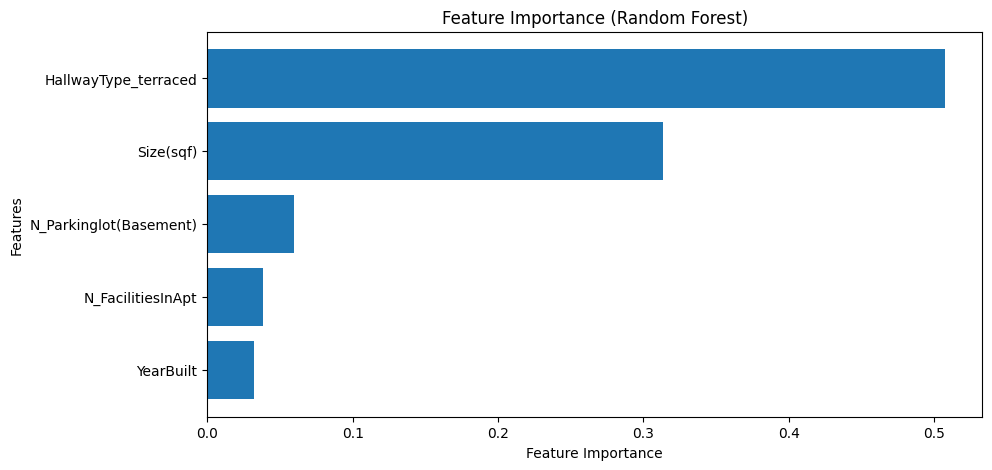

In [133]:
features = [
    "HallwayType_terraced",
    "Size(sqf)",
    "N_Parkinglot(Basement)",
    "N_FacilitiesInApt",
    "YearBuilt"
]

importance = [
    0.507811,
    0.313567,
    0.059778,
    0.038681,
    0.032197
]

plt.figure(figsize=(10, 5))
plt.barh(features, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

**Kesimpulan Feature Importance**

Random Forest menunjukkan bahwa fitur yang paling memengaruhi harga apartemen adalah HallwayType (terraced) dan Size (sqf). Hal ini menunjukkan bahwa faktor kualitas bangunan (hallway type) dan ukuran unit memiliki dampak terbesar terhadap nilai jual. Fitur tambahan seperti jumlah parkir basement, jumlah fasilitas dih gedung, dan tahun pembangunan turut berpengaruh, namun dengan kontribusi yang jauh lebih kecil.

# **Recommendation**

- Socialize Loss Due to Bulk Transaction
- Deploy Machine Learning Model In App
- Display Favourable Feature

### Impact

Without Machine Learning–Loss

2000 x 5% x 221767 = 22.176.700

With Machine Learning--Gain

1600 x 5% x 221767 = 17.741.360